In [68]:
!pip install watson-machine-learning-client

In [69]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url" : "https://us-south.ml.cloud.ibm.com",
    "apikey" : ""
}
client = APIClient(wml_credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [70]:
client = APIClient(wml_credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [71]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [72]:
space_uid = guid_from_space_name(client, 'Natural Disasters Intensity Analysis And Classification')
print('space uid: ' + space_uid)

space uid: c5a8fe50-8690-4da3-87b1-5849ad114d23


In [73]:
client.set.default_space(space_uid)

'SUCCESS'

In [75]:
client.repository.download('8cd312fd-ea3e-4925-896f-a5f5cd36cc89', 'natural_disaster.tar.gz')

Successfully saved model content to file: 'natural_disaster.tar.gz'


'G:\\SI-GuidedProject-49371-1652769290/natural_disaster.tar.gz'

In [76]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [81]:
model = load_model("model.h5")

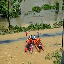

In [95]:
img = image.load_img("C:/Users/Avish Shah/Desktop/dataset/dataset/test_set/Flood/1039.jpg", target_size = (64, 64))
img

In [96]:
import numpy as np

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
pred = np.argmax(model.predict(x), axis=-1)
pred

1/1 [==============================] - 0s 23ms/step


array([2], dtype=int64)

In [97]:
index = ['Cyclone', 'Earthquake', 'Flood', 'WildFire']
result = np.array(index[pred[0]])
result

array('Flood', dtype='<U5')